# Assignment
Take the Restaurant dataset given in google classroom


# Question 1
Calculate sentiment score for each row, 

# Question 2
Get how many rows has negative/positive/neutral comments.

# Question 3
Plot how many rows has negative/positive/neutral comments.

------------

# A hint
The file is stores as a ```tsv```.

You can load a ```tsv``` file with ```pd.read_csv``` while passing the seperator or ```sep``` argument as ```\t```.

This tells pandas that the file is seperated by tab's instead of comma's

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Restaurant_Reviews - Restaurant_Reviews.tsv',sep='\t')

In [4]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
import numpy as np
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Answer 1

In [6]:
positive_wds=set(opinion_lexicon.positive())
negative_wds=set(opinion_lexicon.negative())

In [7]:
# Creating a function to find the sentiment score for each row.
def sentiment(x):
    x.lower()
    y=nltk.word_tokenize(x)
    temp=[]
    for i in y:
         if i in positive_wds: 
             temp.append(1)
         elif i in negative_wds:
            temp.append(-1)
         else:
            temp.append(0)
            import numpy as np
            list=np.average(temp)
    return(list)

In [8]:
# applying the function to the review column of the dataset df.
df["Review"].apply(sentiment)

0      0.000000
1      0.200000
2     -0.111111
3      0.125000
4      0.076923
         ...   
995   -0.076923
996    0.250000
997    0.090909
998    0.000000
999   -0.031250
Name: Review, Length: 1000, dtype: float64

In [9]:
#Storing the sentiment score of each row in a new column called Sentiment.
df['Sentiment'] = df['Review'].apply(sentiment)

In [10]:
df

,Review,Liked,Sentiment
0,Wow... Loved this place.,1,0.000000
1,Crust is not good.,0,0.200000
2,Not tasty and the texture was just nasty.,0,-0.111111
3,Stopped by during the late May bank holiday of...,1,0.125000
4,The selection on the menu was great and so wer...,1,0.076923
...,...,...,...
995,I think food should have flavor and texture an...,0,-0.076923
996,Appetite instantly gone.,0,0.250000
997,Overall I was not impressed and would not go b...,0,0.090909
998,"The whole experience was underwhelming, and I ...",0,0.000000


# Answer 2

In [30]:
# Creating a function to classify the sentiment score among the values 0,1,-1
def senti_class(x):
    temp = 0
    if x > 0:
        temp = 'Positive'
    elif x < 0:
        temp = 'Negative'
    else:
        temp = 'Neutral'
    return temp

In [31]:
# Applying the function on the sentiment column of the data frame df.
df['Sentiment'].apply(senti_class)

0       Neutral
1      Positive
2      Negative
3      Positive
4      Positive
         ...   
995    Negative
996    Positive
997    Positive
998     Neutral
999    Negative
Name: Sentiment, Length: 1000, dtype: object

In [33]:
# Storing the categorized semtiment values in a ne column called Senti_class.
df['Senti_class'] = df['Sentiment'].apply(senti_class)

In [34]:
df

,Review,Liked,Sentiment,Senti_class
0,Wow... Loved this place.,1,0.000000,Neutral
1,Crust is not good.,0,0.200000,Positive
2,Not tasty and the texture was just nasty.,0,-0.111111,Negative
3,Stopped by during the late May bank holiday of...,1,0.125000,Positive
4,The selection on the menu was great and so wer...,1,0.076923,Positive
...,...,...,...,...
995,I think food should have flavor and texture an...,0,-0.076923,Negative
996,Appetite instantly gone.,0,0.250000,Positive
997,Overall I was not impressed and would not go b...,0,0.090909,Positive
998,"The whole experience was underwhelming, and I ...",0,0.000000,Neutral


In [35]:
# Counting the number of rows containing 1,0 and -1 to find  how many rows have negative/positive/neutral comments.
df['Senti_class'].value_counts()

Positive    455
Neutral     352
Negative    193
Name: Senti_class, dtype: int64

# Answer 3

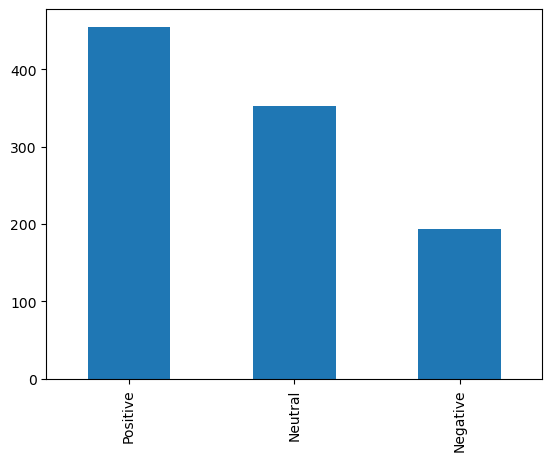

In [36]:
# Plotting the number of rows with negative/positive/neutral comments through a pie chart.
import matplotlib.pyplot as plt
pie_chart=df['Senti_class'].value_counts().plot(kind='bar')

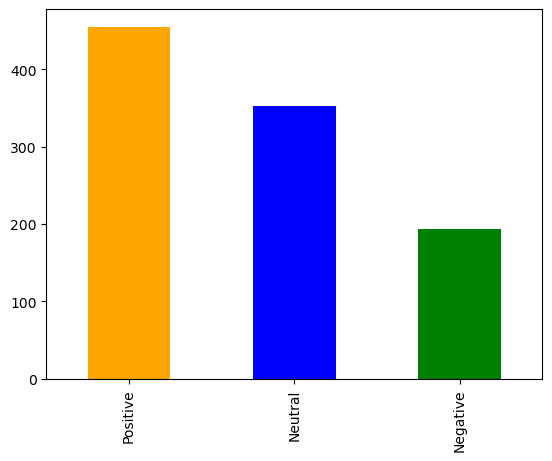

In [47]:
# Adding colors to the graph
pie_chart=df['Senti_class'].value_counts().plot(kind='bar',color=['Orange','blue','green'])